In [1]:
import perceval as pcvl
import sympy as sp
import numpy as np

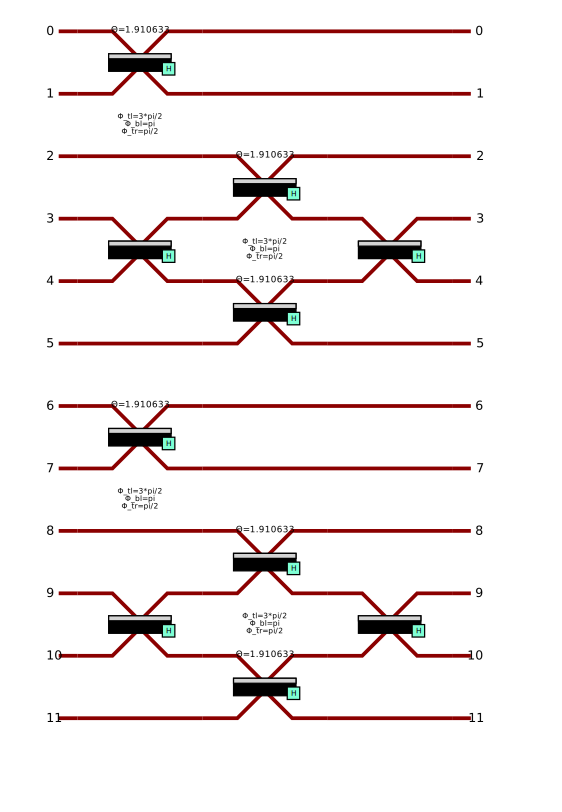

In [22]:
cnot = pcvl.Circuit(12, name="Ralph CNOT")
cnot.add((0, 1), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((3, 4), pcvl.BS.H())
cnot.add((2, 3), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((4, 5), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((3, 4), pcvl.BS.H())
cnot.add((6, 7), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((9, 10), pcvl.BS.H())
cnot.add((8, 9), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((10, 11), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((9, 10), pcvl.BS.H())
pcvl.pdisplay(cnot)

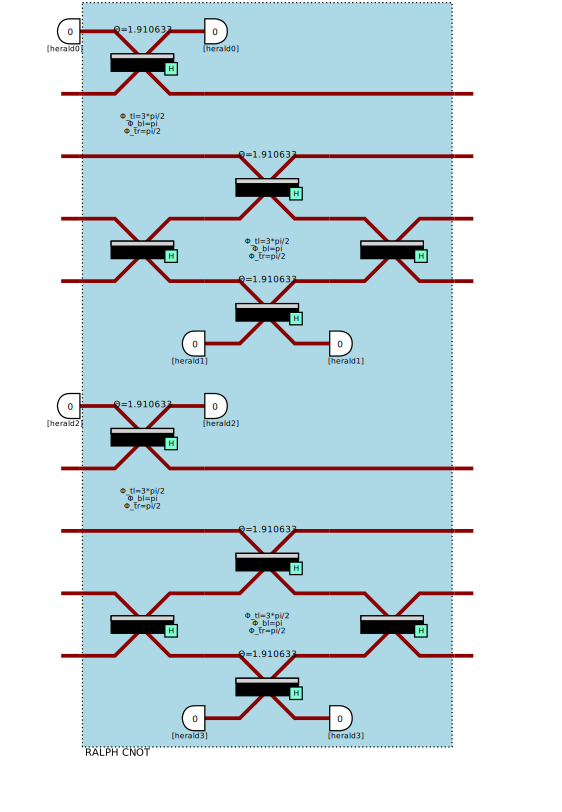

In [25]:

p = pcvl.Processor("Naive", cnot)
p.set_postprocess(lambda s: (s[1] or s[2] or s[7] or s[8]) and (s[3] or s[4] or s[9] or s[10]))
p.add_herald(0, 0)
p.add_herald(5, 0)
p.add_herald(6, 0)
p.add_herald(11, 0)

pcvl.pdisplay(p, recursive = True)

In [28]:
Entre = pcvl.BasicState([0,1,0,0,0,0,0,1])
p.with_input(Entre)
Out = p.probs()['results']

In [29]:
print(Out)

{
  |0,1,0,0,0,0,0,1>: 1/3
  |0,0,1,0,0,1,0,0>: 1/3
  |0,0,0,1,0,1,0,0>: 1/3
}


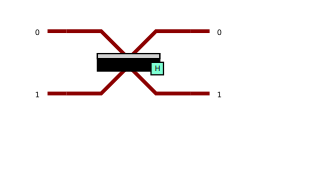

In [15]:
test = pcvl.Circuit(2)
#test.add((0, 1), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
test.add((0, 1), pcvl.BS.H())
pcvl.pdisplay(test)

In [16]:
testinput = pcvl.BasicState([0,0])
testprocess = pcvl.Processor('Naive',test)
testprocess.with_input(testinput)
out = testprocess.probs()['results']
print(out)

{
  |0,0>: 1
}
